In [8]:
"Loading the dataset"
import pandas as pd
data = pd.read_csv("Iris.csv", sep=",")

In [9]:
'''Displaying the data'''
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
'''EDA'''
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
'''Splitting the data into training and test sets'''
from sklearn.model_selection import train_test_split
X = data.select_dtypes(include="float") #features
y = data.select_dtypes(include="object") #labels

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [17]:
'''Feature scaling'''
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
standardized_X_train = feature_scaler.fit_transform(X_train)
standardized_X_test = feature_scaler.fit_transform(X_test)

In [29]:
'''Training the Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = "entropy", random_state = 10)
DT.fit(standardized_X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [30]:
'''Predictions of the Decision Tree Algorithm'''
predictions_DT_train = DT.predict(standardized_X_train)
predictions_DT_test = DT.predict(standardized_X_test)

In [31]:
'''Accuracy score on training and test data'''
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, predictions_DT_train)
accuracy_test = accuracy_score(y_test, predictions_DT_test)
print(accuracy_train)
print(accuracy_test)

1.0
0.9777777777777777


In [32]:
'''Evaluating the performance of Decision Tree Classifier on test data'''
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_DT_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



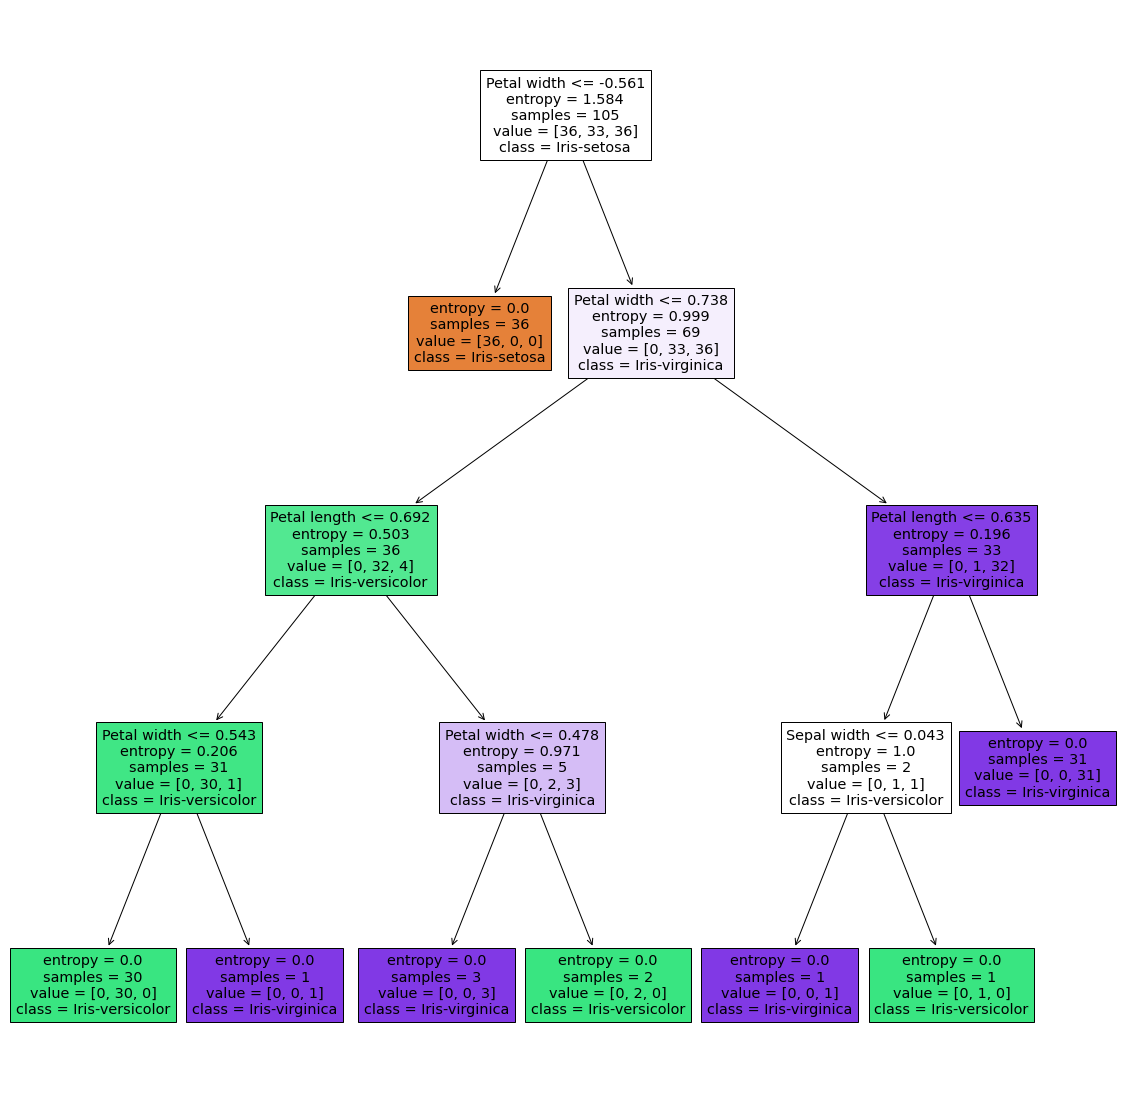

In [41]:
'''Visualising the Decision Tree CLassifier'''
import matplotlib.pyplot as plt
from sklearn import tree
features = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig = plt.figure(figsize=(20,20))
tree = tree.plot_tree(DT, feature_names=features, class_names=labels, filled=True)
plt.show()